In [1]:
# Libraries used
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import the files with the data in dataframes for its posterior analysis
dataset_df = pd.read_csv("dataset.csv")
non_dataset_df = pd.read_csv("non_dataset.csv")

In [3]:
eq = 'equanimity_subsets'
ent = 'entanglement'

In [17]:
"""
1st Experiment:
    - Equanimity = equanimity_subsets, Entanglement.
    - Identify the region, R, where dataset(D) and non dataset(N) intersect in Equanimity metric. This is [min Q(D), max Q(N)].
    - Identify the region, R', where dataset(D) and non dataset(N) intersect in Entanglement metric. This is [min Q(N), max Q(D)].
    - Study the entanglement values for Q(R) and the equanimity values for T(R').
"""

# Identify the region R
min_Q_D = dataset_df[eq].min()
max_Q_N = non_dataset_df[eq].max()
R_D = (dataset_df[eq] >= min_Q_D) & (dataset_df[eq] <= max_Q_N)
R_N = (non_dataset_df[eq] >= min_Q_D) & (non_dataset_df[eq] <= max_Q_N)

# Identify the region R'
min_T_N = non_dataset_df[ent].min()
max_T_D = dataset_df[ent].max()
_R_D = (dataset_df[ent] >= min_T_N) & (dataset_df[ent] <= max_T_D)
_R_N = (non_dataset_df[ent] >= min_T_N) & (non_dataset_df[ent] <= max_T_D)

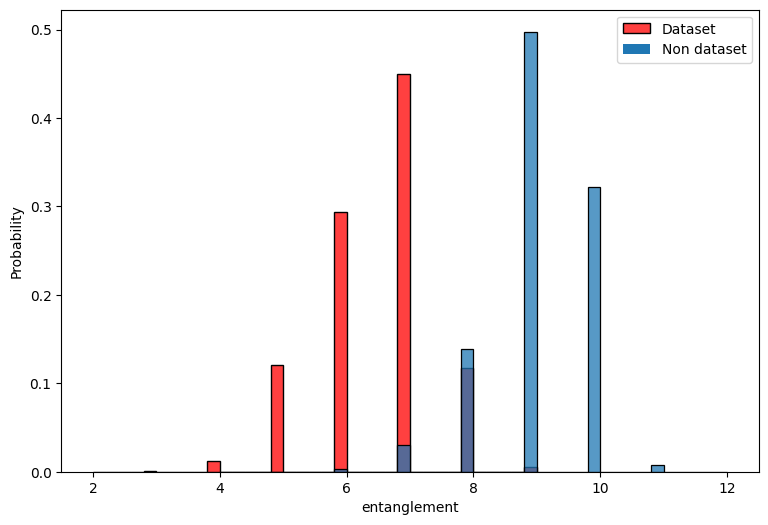

In [10]:
# Study the entanglement values for R
fig, ax = plt.subplots(figsize=(9,6))

sns.histplot(data=dataset_df[R_D], x=ent, color='red', stat='probability', binwidth=0.2, ax=ax)
sns.histplot(data=non_dataset_df[R_N], x=ent, stat='probability', binwidth=0.2, ax=ax)

ax.legend(labels=['Dataset', 'Non dataset'])

plt.show()

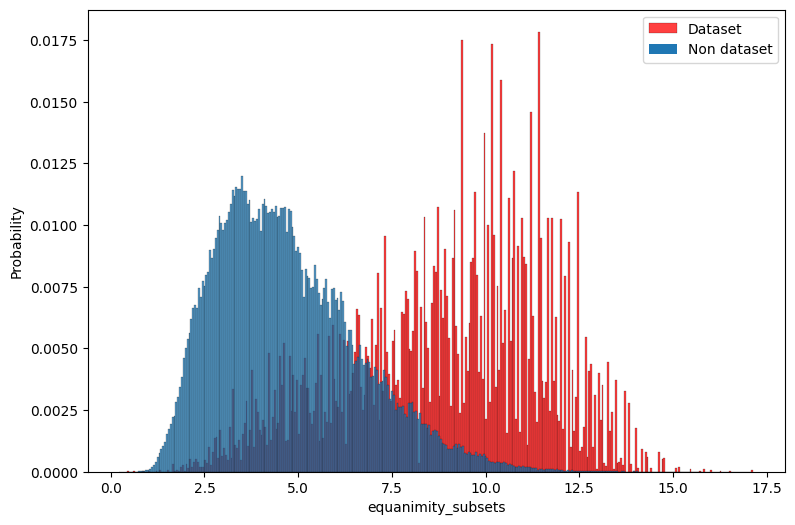

In [18]:
# Study the equanimity values for R'
fig, ax = plt.subplots(figsize=(9,6))

sns.histplot(data=dataset_df[_R_D], x=eq, color='red', stat='probability', binwidth=0.05, ax=ax)
sns.histplot(data=non_dataset_df[_R_N], x=eq, stat='probability', binwidth=0.05, ax=ax)

ax.legend(labels=['Dataset', 'Non dataset'])

plt.show()

In [20]:
"""
2nd Experiment: Same but with mean values and only equanimity to entanglement direction. The other 
                direction is not possible because the mean value for non dataset is higher than the 
                max value for dataset in entanglement.
"""

# Identify the region R'
max_T = non_dataset_df[eq].mean()

9.126513079178421

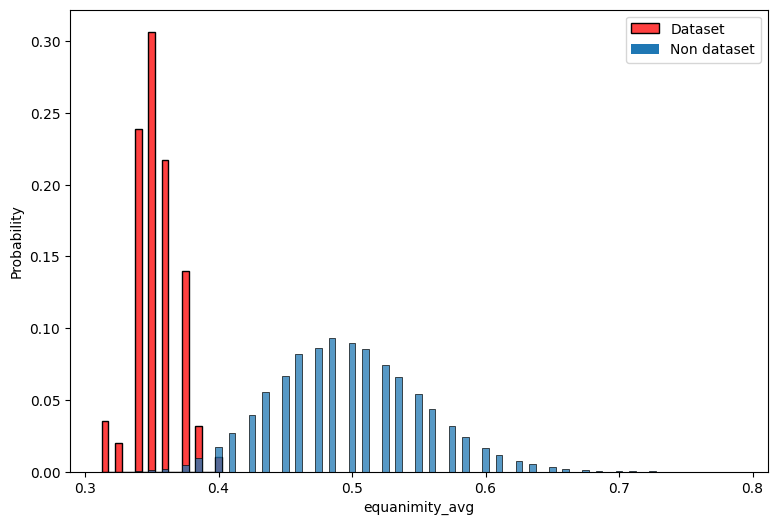

In [24]:
"""
3rd Experiment: What happens with the max entanglement value for dataset functions? What are their
                equanimities?
"""

max_D = dataset_df[ent].max()

fig, ax = plt.subplots(figsize=(9,6))

sns.histplot(data=dataset_df[dataset_df[ent] == max_D], x='equanimity_avg', color='red', stat='probability', binwidth=0.005, ax=ax)
sns.histplot(data=non_dataset_df[non_dataset_df[ent] == max_D], x='equanimity_avg', stat='probability', binwidth=0.005, ax=ax)

ax.legend(labels=['Dataset', 'Non dataset'])

plt.show()
